In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [2]:
aging_data = pd.read_csv('3.xlsx_scaled.csv', header=None)

In [3]:
aging_data.shape

(48, 83)

In [4]:
aging_value = aging_data.iloc[:, 82];


In [5]:
aging_value_rows = aging_value[aging_value > 0]

In [6]:
non_aging_value_rows = aging_value[aging_value == 0]
p = []

RanksumsResult(statistic=2.886751345948129, pvalue=0.003892417122778628)
RanksumsResult(statistic=3.0929478706587097, pvalue=0.001981789437809918)
RanksumsResult(statistic=1.979486637221574, pvalue=0.04776124267510367)
RanksumsResult(statistic=4.206409104095845, pvalue=2.5946036917484256e-05)
RanksumsResult(statistic=4.68066111093018, pvalue=2.8595128916741342e-06)
RanksumsResult(statistic=4.57756284857489, pvalue=4.704244787779707e-06)
RanksumsResult(statistic=2.1032045520479223, pvalue=0.035447892552460766)
RanksumsResult(statistic=2.6702449950020193, pvalue=0.00757959203158261)
RanksumsResult(statistic=2.587766385117787, pvalue=0.009660047071220692)
RanksumsResult(statistic=2.1959929881676836, pvalue=0.028092445265394367)
RanksumsResult(statistic=2.927990650890245, pvalue=0.003411603034363697)
RanksumsResult(statistic=2.886751345948129, pvalue=0.003892417122778628)
RanksumsResult(statistic=2.7217941261796645, pvalue=0.006492857745083879)
RanksumsResult(statistic=2.1032045520479223, 

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=4.68066111093018, pvalue=2.8595128916741342e-06)
RanksumsResult(statistic=4.515703891161716, pvalue=6.310679437143796e-06)
RanksumsResult(statistic=4.721900415872296, pvalue=2.336510858689156e-06)
RanksumsResult(statistic=4.433225281277483, pvalue=9.28337744512092e-06)
RanksumsResult(statistic=4.763139720814412, pvalue=1.9060376716772496e-06)
RanksumsResult(statistic=4.68066111093018, pvalue=2.8595128916741342e-06)
RanksumsRe

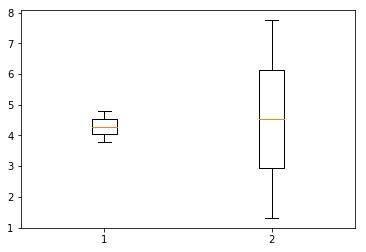

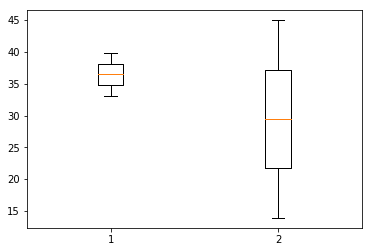

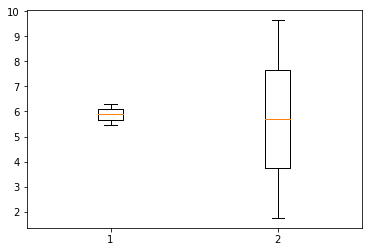

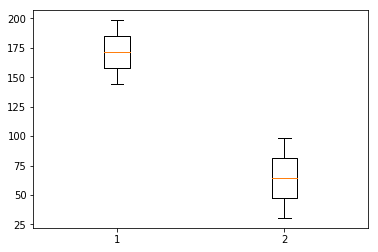

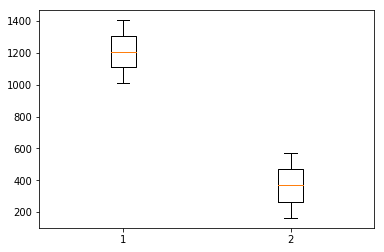

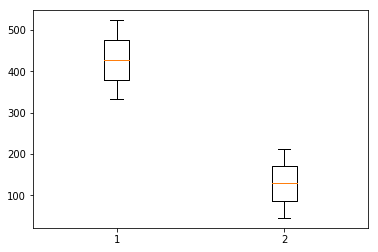

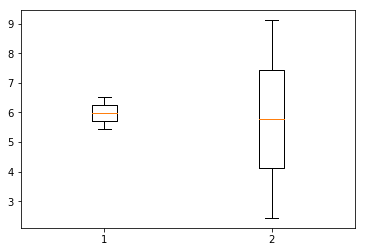

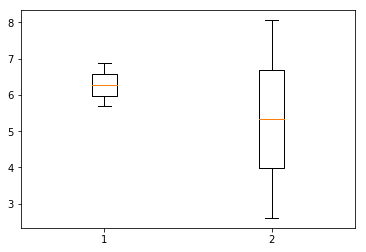

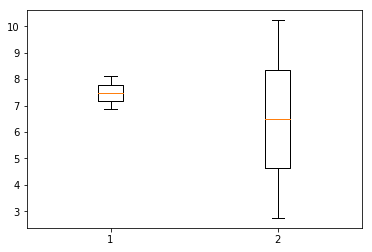

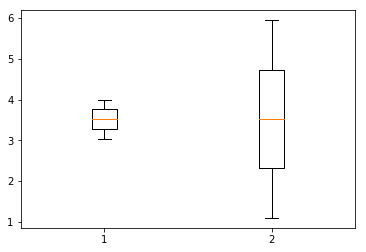

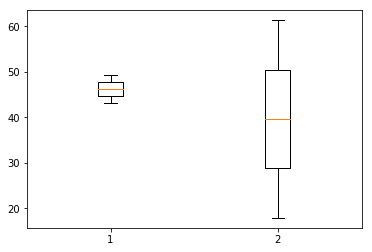

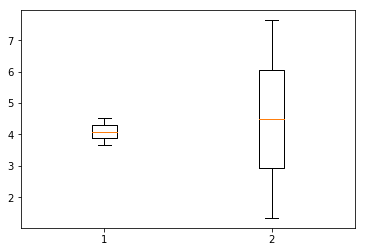

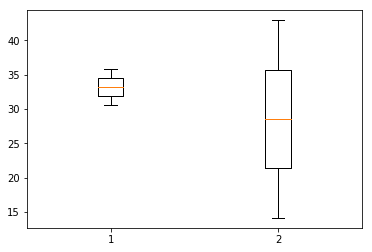

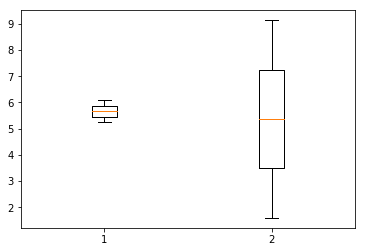

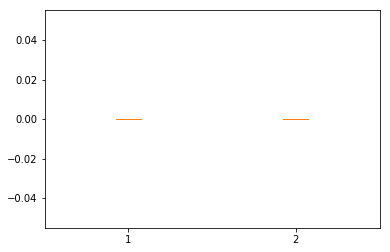

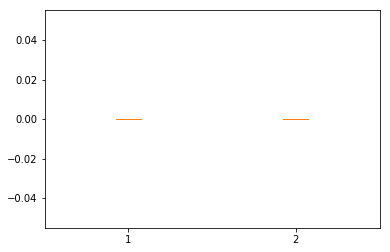

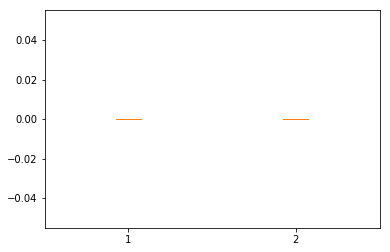

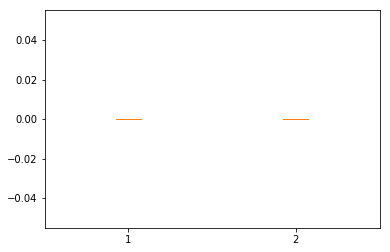

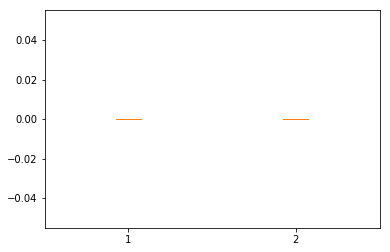

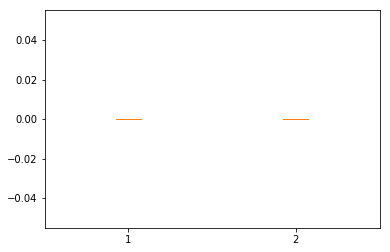

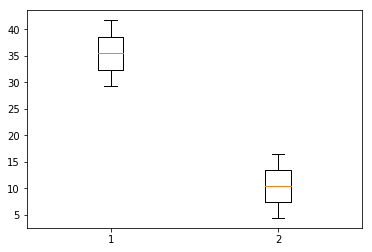

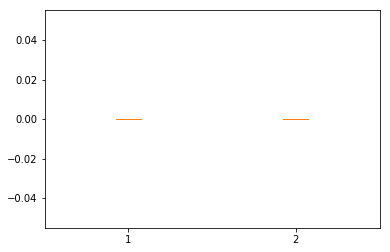

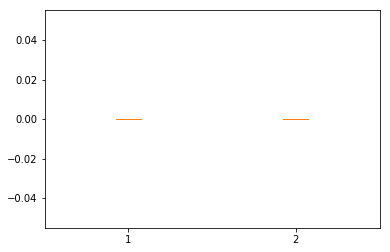

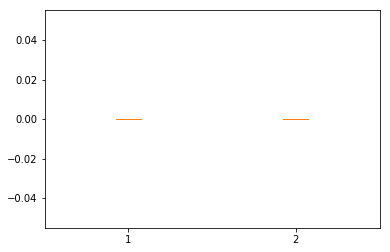

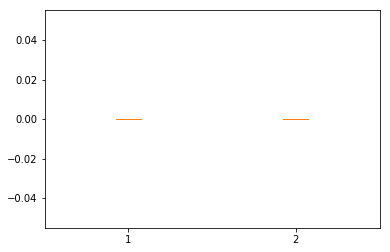

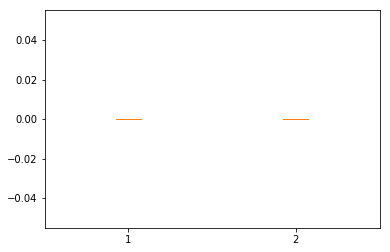

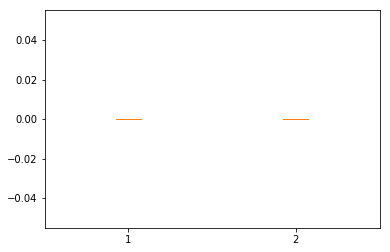

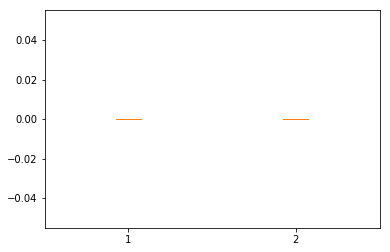

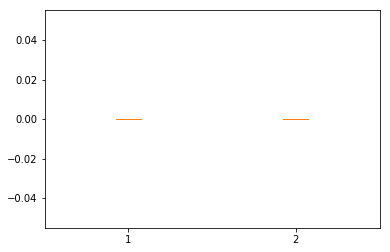

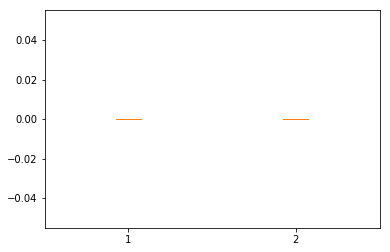

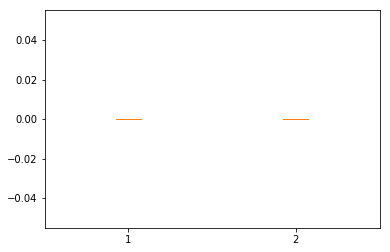

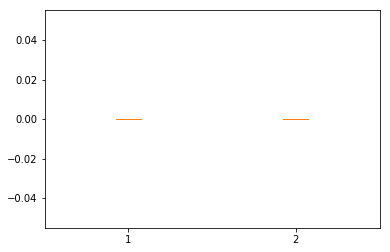

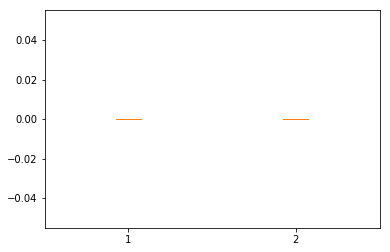

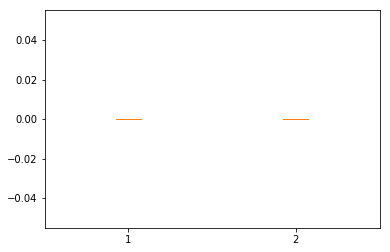

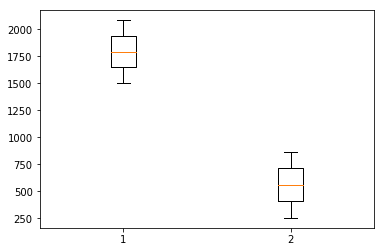

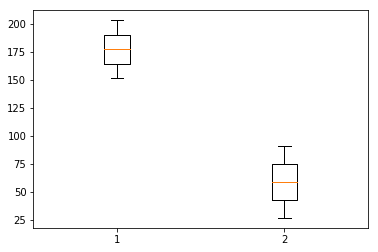

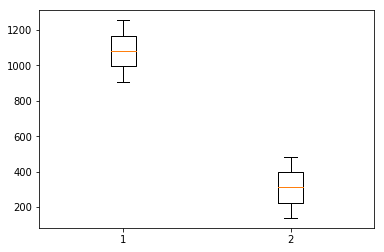

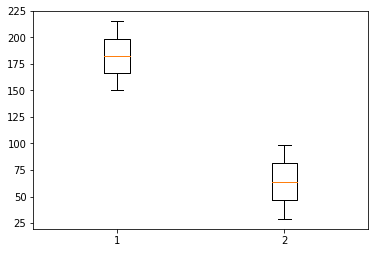

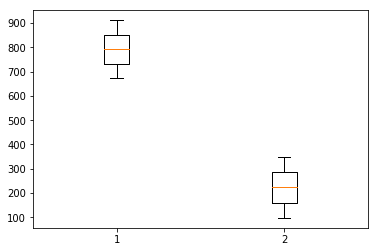

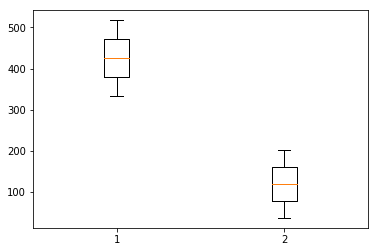

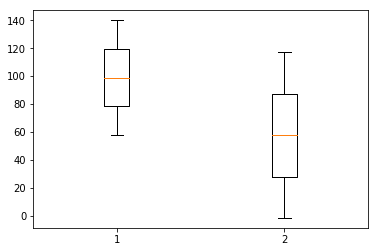

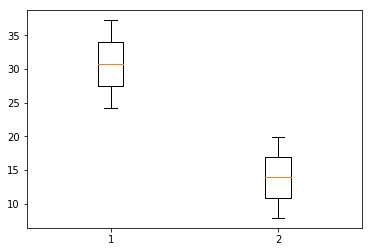

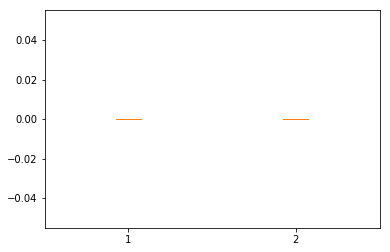

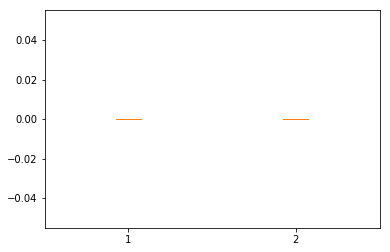

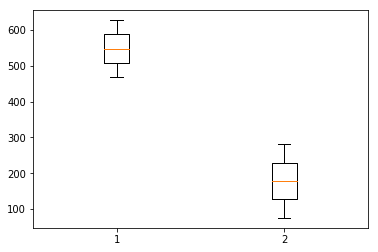

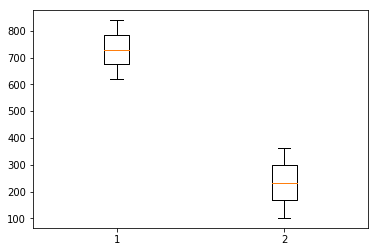

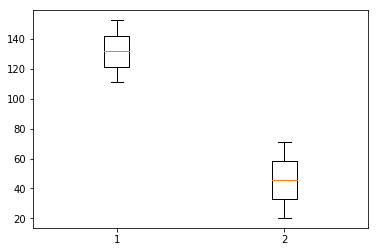

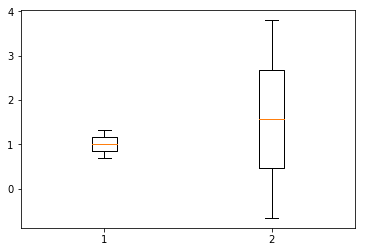

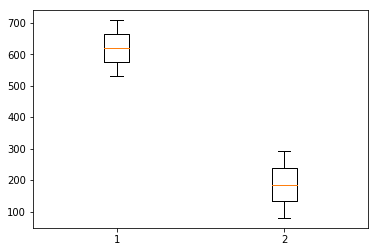

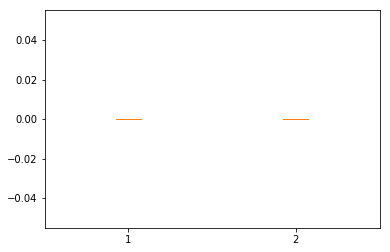

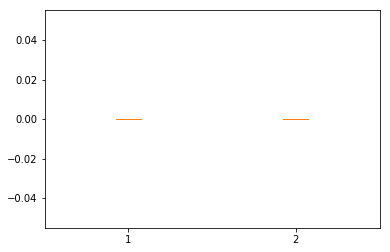

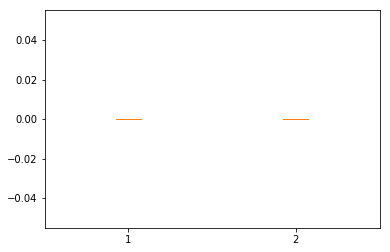

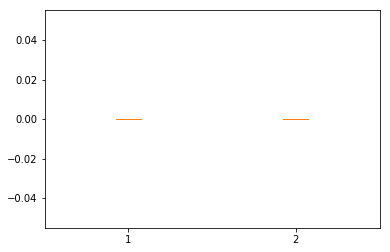

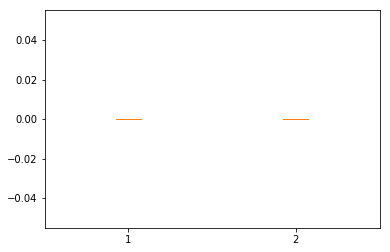

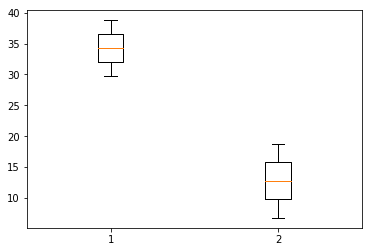

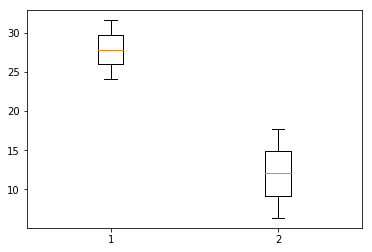

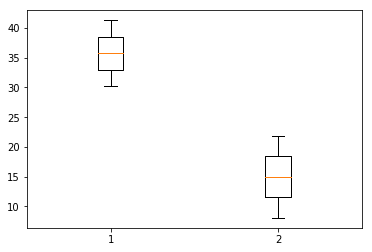

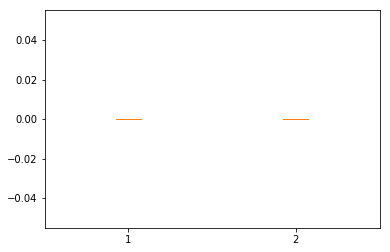

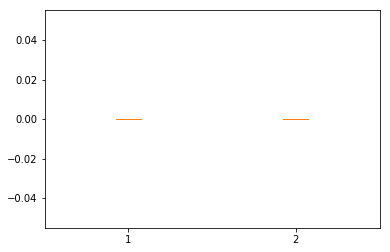

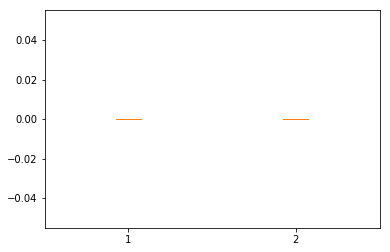

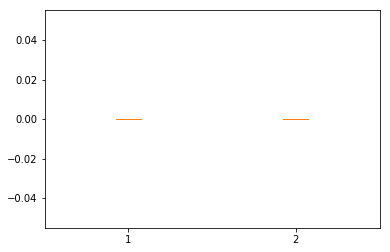

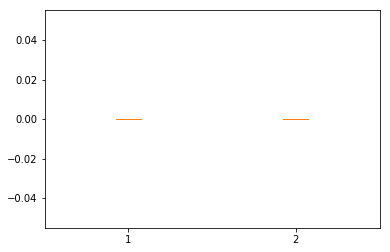

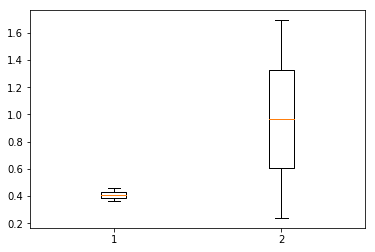

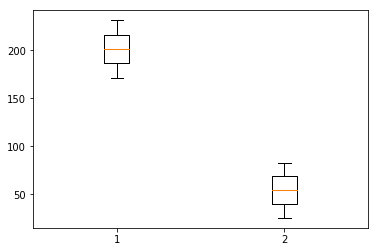

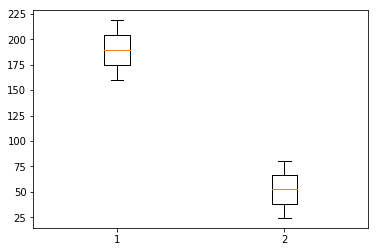

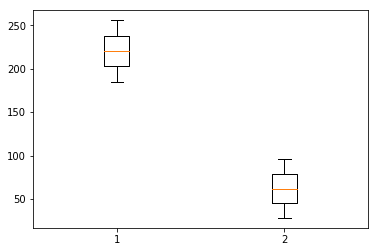

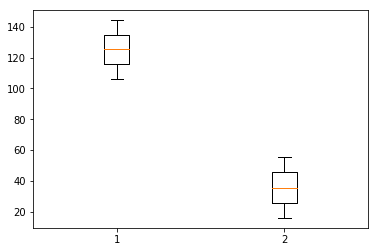

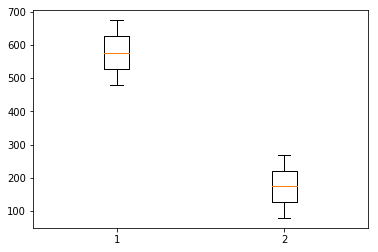

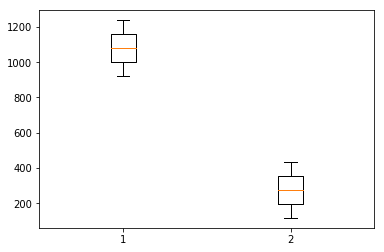

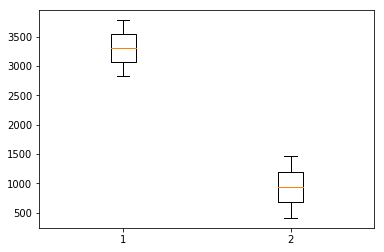

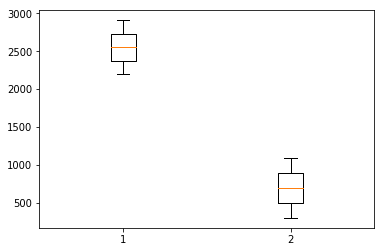

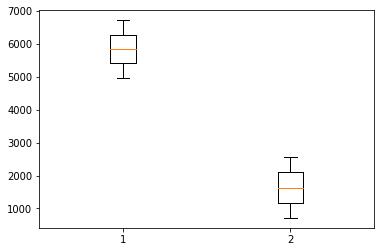

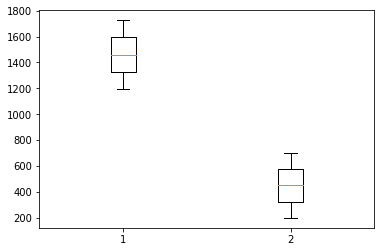

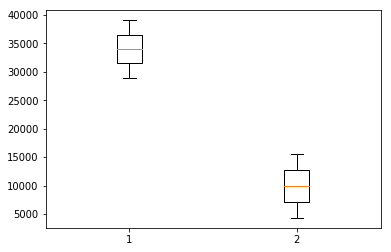

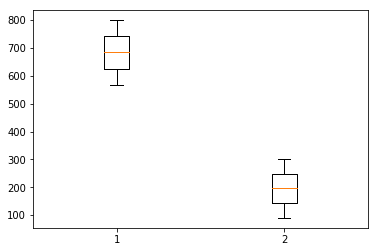

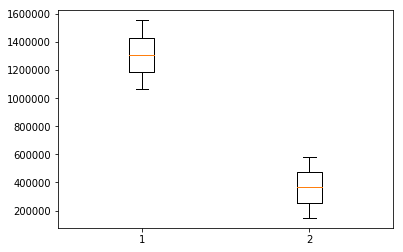

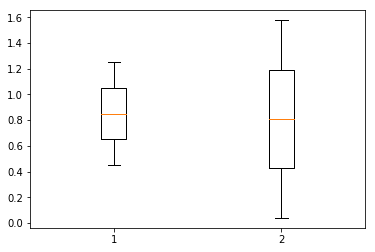

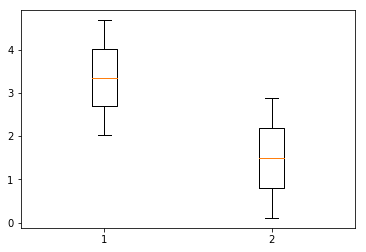

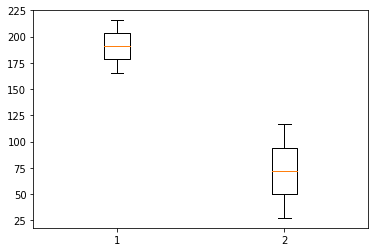

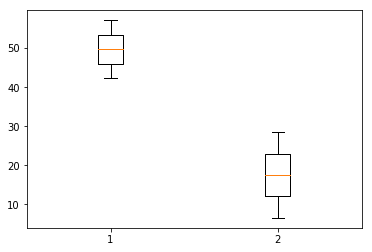

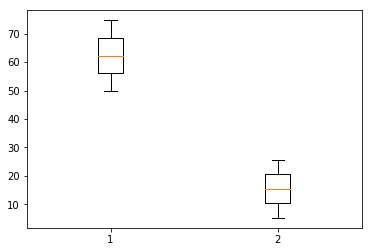

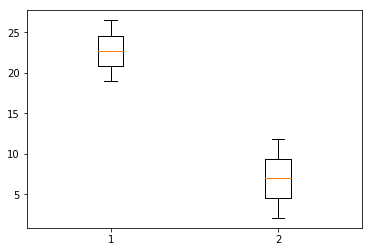

In [7]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes
from scipy.stats import ranksums
for i in range(0,82):
    feature_column = aging_data.iloc[:, i]
    feature_column_aging_value = feature_column.iloc[aging_value_rows.index]
    feature_column_non_aging_value = feature_column.iloc[non_aging_value_rows.index]
    confidance_interval_aging = mean_confidence_interval(feature_column_aging_value)
    confidance_interval_non_aging = mean_confidence_interval(feature_column_non_aging_value)
    pair = [confidance_interval_aging, confidance_interval_non_aging]
    fig = plt.figure()
    plt.boxplot(pair)
    index = str(i+1)
    fig.savefig("box_plots3/box"+index)
    p.append(ranksums(feature_column_aging_value, feature_column_non_aging_value) )
    print(p[i])

In [8]:
%store -r result_array


In [9]:
for i in range(0, 82):
    if (p[i][1] <= 0.05):
        result_array[2].append(1)
           
    else:
        result_array[2].append(0)

In [12]:
len(result_array[2])

82

In [13]:
%store result_array

Stored 'result_array' (list)
